In [69]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
Cleaning data means:
    
upoading data from multiples sources
filtering data as per business requirement
sort row or columns
modifying columns
renaming columns
performing joining
removing null values
Detecting Outliers through various methods and removing them
Normalization(doesn't have Gaussian distribution) and Standardization(having Gaussian distribution)
removing null values and 
changing data type and so on

In [25]:
ipl  = pd.read_csv('C:/Users/DELL/Desktop/Matches24.csv')
ipl.head(10)

,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,Match_winner,Toss_Name,win_by_runs,win_by_wickets,Result_Type,ManOfMach,Win_Margin,Country_id
0,1,Kolkata Knight Riders,Mumbai Indians,4/8/2015,2015,Eden Gardens,Kolkata,India,Kolkata Knight Riders,Kolkata Knight Riders,field,0,1,Normal,M Morkel,1.0,1
1,2,Chennai Super Kings,Delhi Daredevils,4/9/2015,2015,"MA Chidambaram Stadium, Chepauk",Chennai,India,Delhi Daredevils,Chennai Super Kings,field,4,0,Normal,A Nehra,4.0,1
2,3,Kings XI Punjab,Rajasthan Royals,4/10/2015,2015,Maharashtra Cricket Association Stadium,Pune,India,Kings XI Punjab,Rajasthan Royals,field,7,0,Normal,JP Faulkner,7.0,1
3,4,Chennai Super Kings,Sunrisers Hyderabad,4/11/2015,2015,"MA Chidambaram Stadium, Chepauk",Chennai,India,Chennai Super Kings,Chennai Super Kings,bat,4,0,Normal,BB McCullum,4.0,1
4,5,Kolkata Knight Riders,Royal Challengers Bangalore,4/11/2015,2015,Eden Gardens,Kolkata,India,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,6,Normal,CH Gayle,6.0,1
5,6,Delhi Daredevils,Rajasthan Royals,4/12/2015,2015,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Rajasthan Royals,field,0,3,Normal,DJ Hooda,3.0,1
6,7,Mumbai Indians,Kings XI Punjab,4/12/2015,2015,Wankhede Stadium,Mumbai,India,Mumbai Indians,Kings XI Punjab,field,20,0,Normal,GJ Bailey,20.0,1
7,8,Royal Challengers Bangalore,Sunrisers Hyderabad,4/13/2015,2015,M Chinnaswamy Stadium,Bangalore,India,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,2,Normal,DA Warner,2.0,1
8,9,Rajasthan Royals,Mumbai Indians,4/14/2015,2015,"Sardar Patel Stadium, Motera",Ahmedabad,India,Mumbai Indians,Rajasthan Royals,bat,0,4,Normal,SPD Smith,4.0,1
9,10,Kolkata Knight Riders,Chennai Super Kings,4/30/2015,2015,Eden Gardens,Kolkata,India,Kolkata Knight Riders,Kolkata Knight Riders,field,0,1,Normal,AD Russell,1.0,1


In [26]:
ipl.shape

(179, 17)

In [27]:
ipl['ManOfMach'].value_counts()[0:5]

DA Warner         8
AB de Villiers    6
V Kohli           6
RG Sharma         6
AD Russell        6
Name: ManOfMach, dtype: int64

In [28]:
list(ipl['ManOfMach'].value_counts()[0:5].keys())

['DA Warner', 'AB de Villiers', 'V Kohli', 'RG Sharma', 'AD Russell']

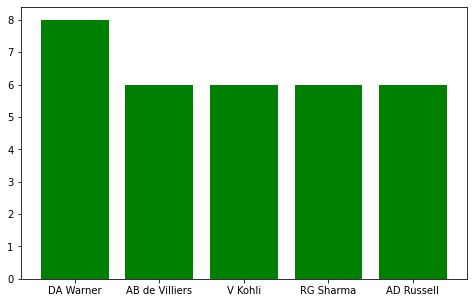

In [29]:
plt.figure(figsize=(8,5))
plt.bar(list(ipl['ManOfMach'].value_counts()[0:5].keys()), list(ipl['ManOfMach'].value_counts()[0:5]), color='g')
plt.show()

In [30]:
ipl['Result_Type'].value_counts()

Normal       165
Tied           8
No Result      3
tied           1
Superover      1
abandoned      1
Name: Result_Type, dtype: int64

In [31]:
ipl['Toss_Winner'].value_counts()

Mumbai Indians                 27
Royal Challengers Bangalore    25
Kolkata Knight Riders          23
Delhi Daredevils               21
Sunrisers Hyderabad            21
Kings XI Punjab                17
Gujarat Lions                  15
Rising Pune Supergiants        12
Chennai Super Kings            10
Rajasthan Royals                6
Rising Pune Supergiant          1
Name: Toss_Winner, dtype: int64

,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,Match_winner,Toss_Name,win_by_runs,win_by_wickets,Result_Type,ManOfMach,Win_Margin,Country_id
0,1,Kolkata Knight Riders,Mumbai Indians,4/8/2015,2015,Eden Gardens,Kolkata,India,Kolkata Knight Riders,Kolkata Knight Riders,field,0,1,Normal,M Morkel,7.0,1
1,2,Chennai Super Kings,Delhi Daredevils,4/9/2015,2015,"MA Chidambaram Stadium, Chepauk",Chennai,India,Delhi Daredevils,Chennai Super Kings,field,4,0,Normal,A Nehra,1.0,1
2,3,Kings XI Punjab,Rajasthan Royals,4/10/2015,2015,Maharashtra Cricket Association Stadium,Pune,India,Kings XI Punjab,Rajasthan Royals,field,7,0,Normal,JP Faulkner,26.0,1
3,4,Chennai Super Kings,Sunrisers Hyderabad,4/11/2015,2015,"MA Chidambaram Stadium, Chepauk",Chennai,India,Chennai Super Kings,Chennai Super Kings,bat,4,0,Normal,BB McCullum,45.0,1
4,5,Kolkata Knight Riders,Royal Challengers Bangalore,4/11/2015,2015,Eden Gardens,Kolkata,India,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,6,Normal,CH Gayle,3.0,1


In [32]:
batting_first = ipl[ipl['win_by_runs']!=0]

In [34]:
batting_first.head(5)

,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,Match_winner,Toss_Name,win_by_runs,win_by_wickets,Result_Type,ManOfMach,Win_Margin,Country_id
0,1,Kolkata Knight Riders,Mumbai Indians,4/8/2015,2015,Eden Gardens,Kolkata,India,Kolkata Knight Riders,Kolkata Knight Riders,field,0,1,Normal,M Morkel,1.0,1
1,2,Chennai Super Kings,Delhi Daredevils,4/9/2015,2015,"MA Chidambaram Stadium, Chepauk",Chennai,India,Delhi Daredevils,Chennai Super Kings,field,4,0,Normal,A Nehra,4.0,1
2,3,Kings XI Punjab,Rajasthan Royals,4/10/2015,2015,Maharashtra Cricket Association Stadium,Pune,India,Kings XI Punjab,Rajasthan Royals,field,7,0,Normal,JP Faulkner,7.0,1
3,4,Chennai Super Kings,Sunrisers Hyderabad,4/11/2015,2015,"MA Chidambaram Stadium, Chepauk",Chennai,India,Chennai Super Kings,Chennai Super Kings,bat,4,0,Normal,BB McCullum,4.0,1
4,5,Kolkata Knight Riders,Royal Challengers Bangalore,4/11/2015,2015,Eden Gardens,Kolkata,India,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,6,Normal,CH Gayle,6.0,1


TypeError: 'value' must be an instance of str or bytes, not a float

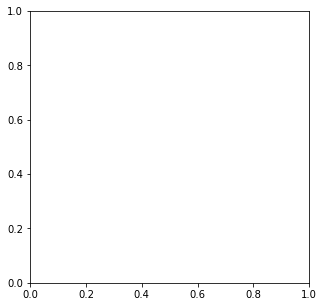

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.show()

In [37]:
batting_first = ipl[ipl['win_by_runs']!=0]
batting_first.head()

,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,Match_winner,Toss_Name,win_by_runs,win_by_wickets,Result_Type,ManOfMach,Win_Margin,Country_id
0,1,Kolkata Knight Riders,Mumbai Indians,4/8/2015,2015,Eden Gardens,Kolkata,India,Kolkata Knight Riders,Kolkata Knight Riders,field,0,1,Normal,M Morkel,1.0,1
1,2,Chennai Super Kings,Delhi Daredevils,4/9/2015,2015,"MA Chidambaram Stadium, Chepauk",Chennai,India,Delhi Daredevils,Chennai Super Kings,field,4,0,Normal,A Nehra,4.0,1
2,3,Kings XI Punjab,Rajasthan Royals,4/10/2015,2015,Maharashtra Cricket Association Stadium,Pune,India,Kings XI Punjab,Rajasthan Royals,field,7,0,Normal,JP Faulkner,7.0,1
3,4,Chennai Super Kings,Sunrisers Hyderabad,4/11/2015,2015,"MA Chidambaram Stadium, Chepauk",Chennai,India,Chennai Super Kings,Chennai Super Kings,bat,4,0,Normal,BB McCullum,4.0,1
4,5,Kolkata Knight Riders,Royal Challengers Bangalore,4/11/2015,2015,Eden Gardens,Kolkata,India,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,6,Normal,CH Gayle,6.0,1


In [38]:
batting_first['Match_winner'].value_counts()

Mumbai Indians                 26
Sunrisers Hyderabad            24
Kolkata Knight Riders          23
Royal Challengers Bangalore    20
Delhi Daredevils               16
Kings XI Punjab                14
Rising Pune Supergiants        14
Gujarat Lions                  12
Chennai Super Kings            10
Tied                            8
Rajasthan Royals                7
tied                            1
abandoned                       1
Name: Match_winner, dtype: int64

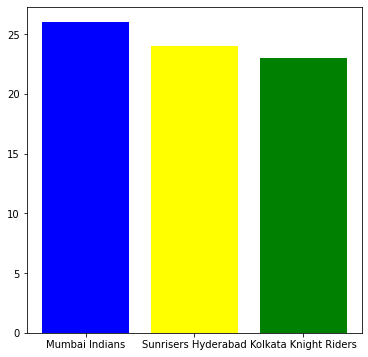

In [39]:
plt.figure(figsize = (6,6))
plt.bar(list(batting_first['Match_winner'].value_counts()[0:3].keys()), list(batting_first['Match_winner'].value_counts()[0:3]),color=['blue','yellow','green'])
plt.show()

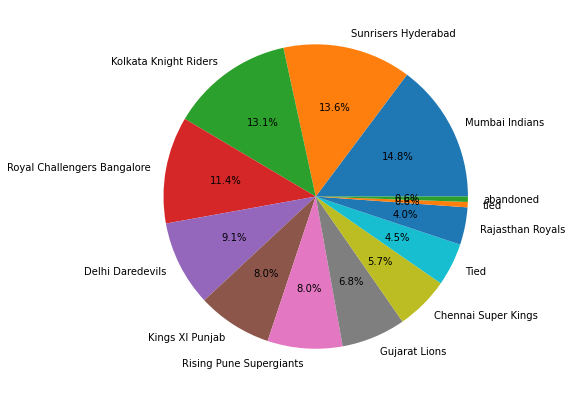

In [40]:
plt.figure(figsize = (7,7))
plt.pie(list(batting_first['Match_winner'].value_counts()),labels=list(batting_first['Match_winner'].value_counts().keys()), autopct ='%0.1f%%')
plt.show()        

In [21]:
import pandas as pd
ipl1  = pd.read_csv('C:/Users/DELL/Desktop/Matches1.csv')
ipl1.head(3)

,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_by_runs,Win_by wickets,Result_type,ManOfMach,Win_Margin,Country_id
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4/5/2017,2017,Rajiv Gandhi International Stadium Uppal,Hyderabad (Deccan),India,Royal Challengers Bangalore,Sunrisers Hyderabad,Field,35,0,Normal,Yuvraj Singh,35,1
1,2,Rising Pune Supergiants,Mumbai Indians,4/6/2017,2017,Maharashtra Cricket Association Stadium,Pune,India,Rising Pune Supergiant,Rising Pune Supergiants,Field,0,7,Normal,SPD Smith,7,1
2,3,Gujarat Lions,Kolkata Knight Riders,4/7/2017,2017,Saurashtra Cricket Association Stadium,Rajkot,India,Kolkata Knight Riders,Kolkata Knight Riders,Field,0,10,Normal,CA Lynn,10,1


In [25]:
Batting_second = ipl1[ipl1['Win_by wickets']!=0]
Batting_second.head(3)

,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_by_runs,Win_by wickets,Result_type,ManOfMach,Win_Margin,Country_id
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4/5/2017,2017,Rajiv Gandhi International Stadium Uppal,Hyderabad (Deccan),India,Royal Challengers Bangalore,Sunrisers Hyderabad,Field,35,0,Normal,Yuvraj Singh,35,1
1,2,Rising Pune Supergiants,Mumbai Indians,4/6/2017,2017,Maharashtra Cricket Association Stadium,Pune,India,Rising Pune Supergiant,Rising Pune Supergiants,Field,0,7,Normal,SPD Smith,7,1
2,3,Gujarat Lions,Kolkata Knight Riders,4/7/2017,2017,Saurashtra Cricket Association Stadium,Rajkot,India,Kolkata Knight Riders,Kolkata Knight Riders,Field,0,10,Normal,CA Lynn,10,1


In [37]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))
Batting_second = ipl1[ipl1['win_by wickets']!=0]
plt.hist(Batting_second['win_by wickets'],bins = 30)
plt.show()

KeyError: 'win_by wickets'

<Figure size 504x504 with 0 Axes>

In [33]:
Batting_second = ipl1[ipl1['Win_by wickets']!=0]
Batting_second['match_winner'].value_counts()

Mumbai Indians                 10
Rising Pune Supergiants        10
Kolkata Knight Riders           9
Sunrisers Hyderabad             7
tied                            5
Kings XI Punjab                 5
Delhi Daredevils                5
Gujarat Lions                   4
Royal Challengers Bangalore     3
None                            1
abandoned                       1
Name: match_winner, dtype: int64

In [67]:
ipl['Season_Year'].value_counts()

2017    60
2016    60
2015    59
Name: Season_Year, dtype: int64

In [68]:
ipl['City_Name'].value_counts()

Mumbai                23
Kolkata               21
Delhi                 19
Bangalore             16
Pune                  15
Chandigarh            11
Hyderabad             11
Rajkot                10
Visakhapatnam          9
Bengaluru              9
Hyderabad (Deccan)     8
Chennai                7
Mohali                 4
Ahmedabad              4
Kanpur                 4
Raipur                 4
Indore                 3
Ranchi                 1
Name: City_Name, dtype: int64

In [70]:
np.sum(ipl['Toss_Winner']==ipl['Match_winner'])

90